# Probabilistic Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Simulating data
The following function simulates flipping a biased coin. 

In [2]:
# This function is given, nothing to do here.
def simulate_data(num_samples, tails_proba):
    """Simulate a sequence of i.i.d. coin flips.
    
    Tails are denoted as 1 and heads are denoted as 0.
    
    Parameters
    ----------
    num_samples : int
        Number of samples to generate.
    tails_proba : float in range (0, 1)
        Probability of observing tails.
    
    Returns
    -------
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    """
    return np.random.choice([0, 1], size=(num_samples), p=[1 - tails_proba, tails_proba])

In [3]:
np.random.seed(123)  # for reproducibility
num_samples = 20
tails_proba = 0.7 # theta
samples = simulate_data(num_samples, tails_proba)
print(samples)

[1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1]


## Task 1: Compute $\log p(\mathcal{D} \mid \theta)$ for different values of $\theta$

In [4]:
def compute_log_likelihood(theta, samples):
    """Compute log p(D | theta) for the given values of theta.
    
    Parameters
    ----------
    theta : array, shape (num_points)
        Values of theta for which it's necessary to evaluate the log-likelihood.
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    
    Returns
    -------
    log_likelihood : array, shape (num_points)
        Values of log-likelihood for each value in theta.
    """
    tails_count = sum(samples)
    heads_count = len(samples) - tails_count
    return tails_count * np.log(theta) + heads_count * np.log(1 - theta)
    

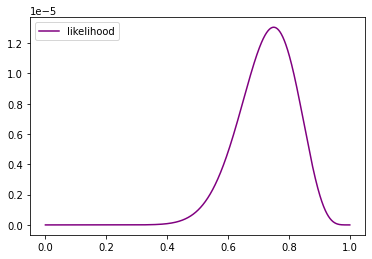

In [19]:
x = np.linspace(1e-5, 1-1e-5, 1000)
log_likelihood = compute_log_likelihood(x, samples)
likelihood = np.exp(log_likelihood)
plt.plot(x, likelihood, label='likelihood', c='purple')
plt.legend()

In [6]:
# likelihood function doesn't define a probability distribution over theta. To show that we approximate its integral
# 1.0 is the length of the interval over which we are integrating p(D | theta)
int_likelihood = 1.0 * np.mean(likelihood)
print(f'Integral = {int_likelihood:.4}')

Integral = 3.068e-06


## Task 2: Compute $\theta_{MLE}$

In [9]:
def compute_theta_mle(samples):
    """Compute theta_MLE for the given data.
    
    Parameters
    ----------
    samples : array, shape (num_samples)
        Outcomes of simulated coin flips. Tails is 1 and heads is 0.
    
    Returns
    -------
    theta_mle : float
        Maximum likelihood estimate of theta.
    """
    
    tails_count = sum(samples)
    return tails_count / len(samples)
    
    

In [11]:
theta_mle = compute_theta_mle(samples)
print(f'theta_mle = {theta_mle:.3f}')

theta_mle = 0.750
